In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/1/20,725,6720,644,14,424,804,7288,432,116,1537
5/2/20,733,7090,688,14,446,1010,7578,463,116,1611
5/3/20,739,7090,703,15,490,1055,7954,469,116,1649
5/4/20,742,7197,730,15,555,1178,8235,471,116,1668


In [4]:
deaths.head()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0


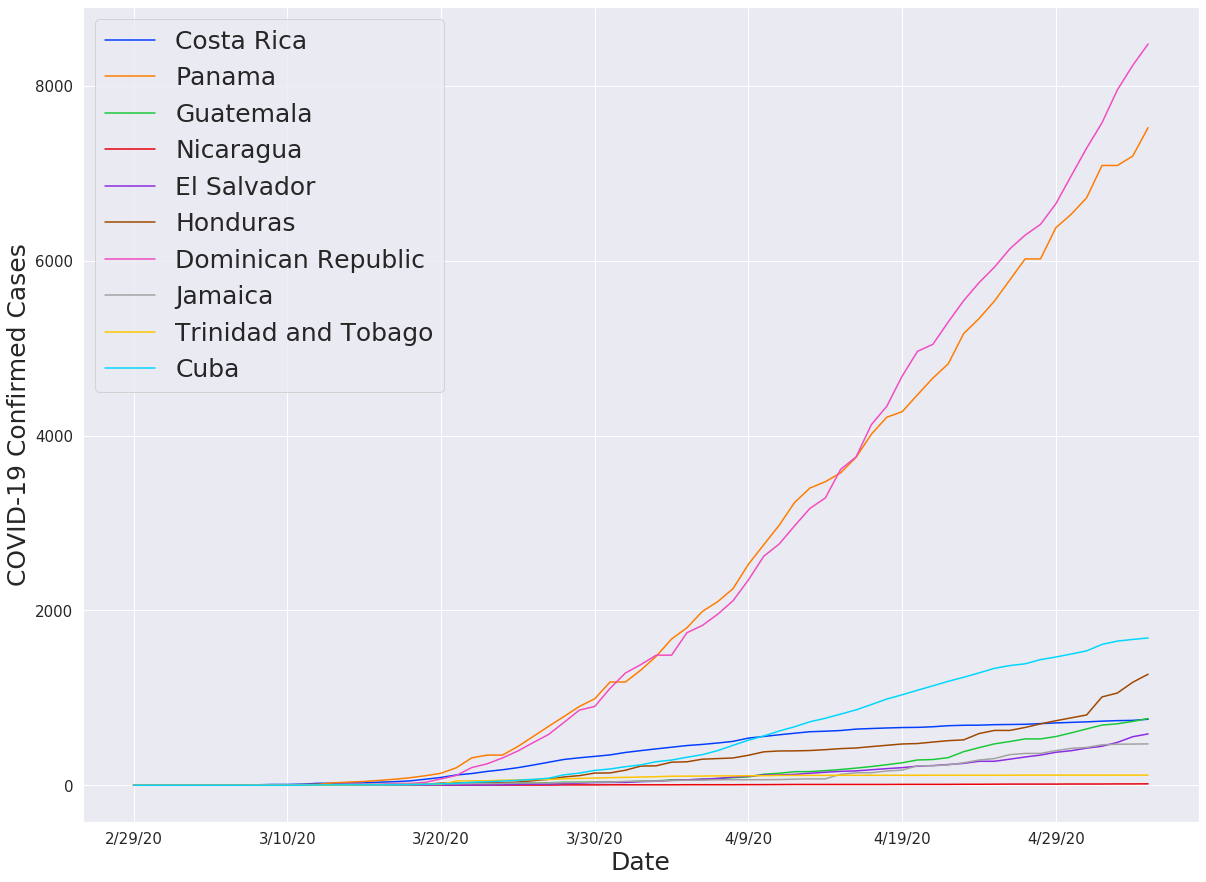

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

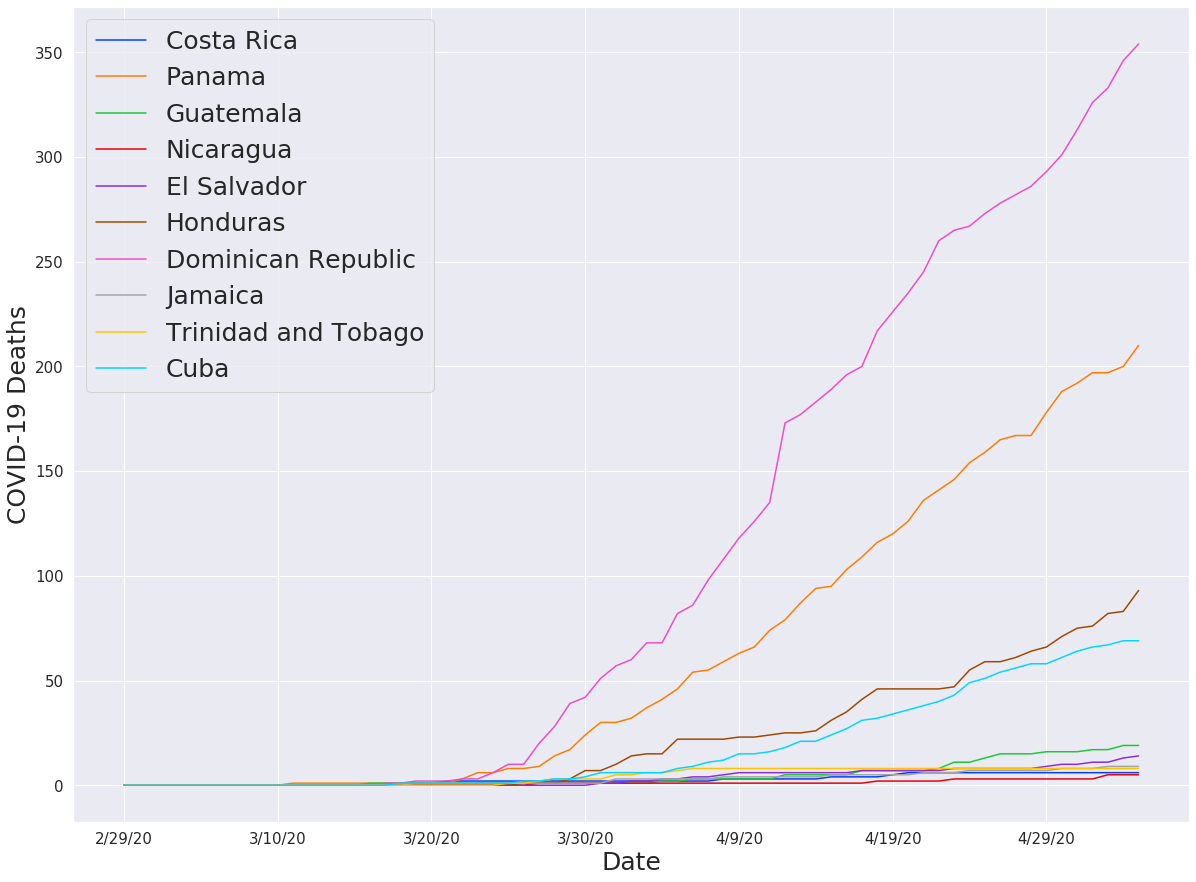

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
3/1/20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3/2/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/3/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/4/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/5/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5/1/20,6.0,188.0,45.0,0.0,29.0,33.0,316.0,10.0,0.0,36.0
5/2/20,8.0,370.0,44.0,0.0,22.0,206.0,290.0,31.0,0.0,74.0
5/3/20,6.0,0.0,15.0,1.0,44.0,45.0,376.0,6.0,0.0,38.0
5/4/20,3.0,107.0,27.0,0.0,65.0,123.0,281.0,2.0,0.0,19.0


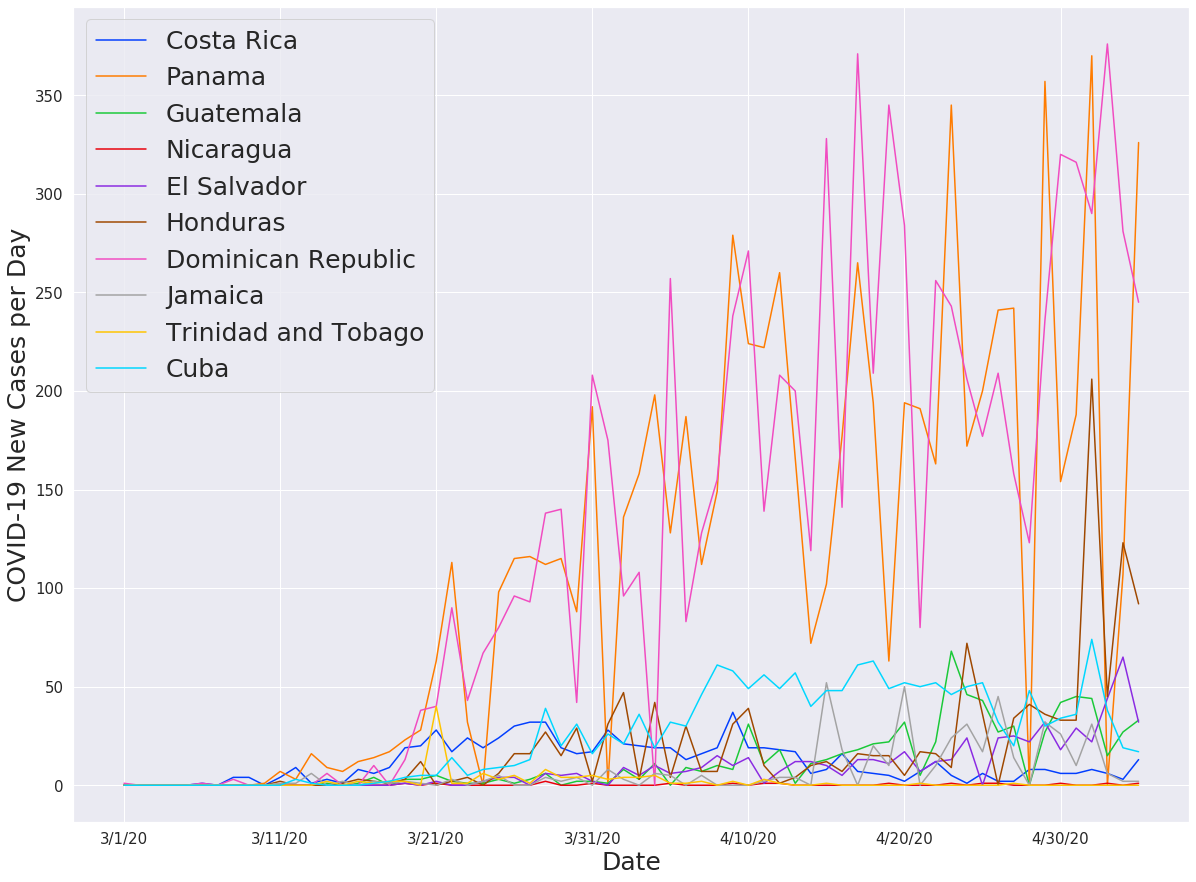

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

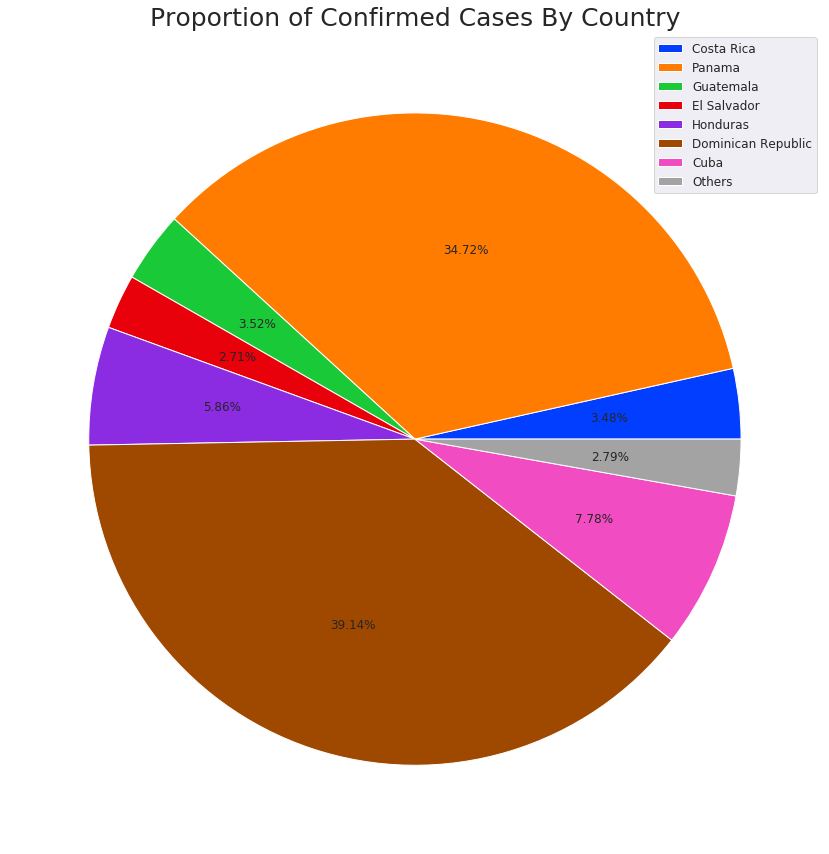

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

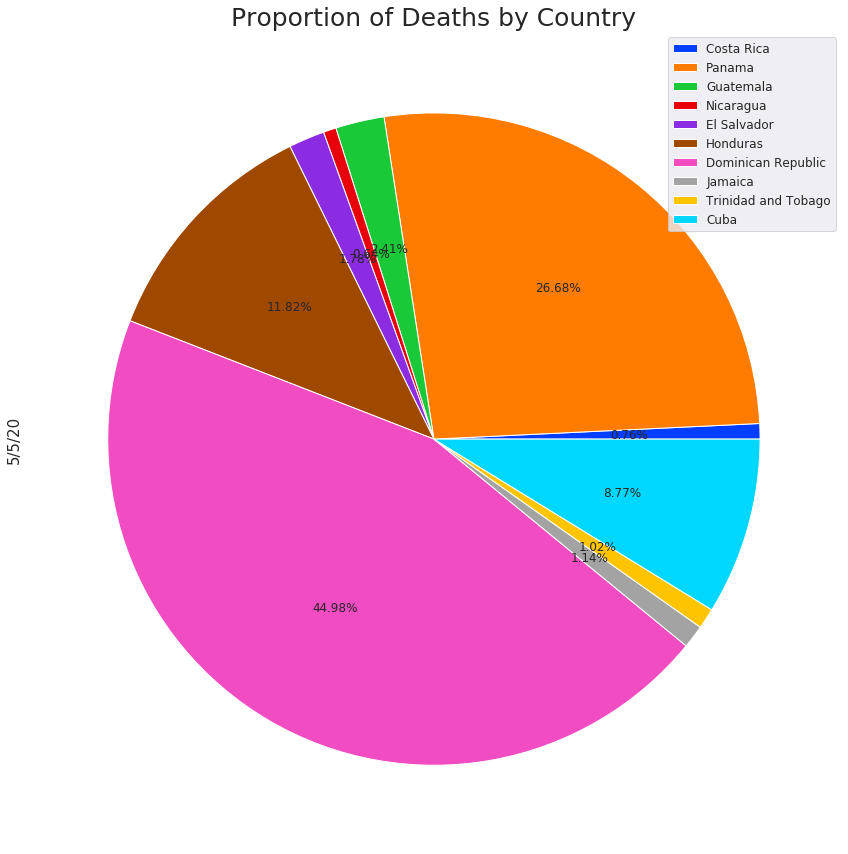

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/1/20,1.008345,1.028781,1.075125,1.000000,1.073418,1.042802,1.045324,1.023697,1.0,1.023984
5/2/20,1.011034,1.055060,1.068323,1.000000,1.051887,1.256219,1.039791,1.071759,1.0,1.048146
5/3/20,1.008186,1.000000,1.021802,1.071429,1.098655,1.044554,1.049617,1.012959,1.0,1.023588
5/4/20,1.004060,1.015092,1.038407,1.000000,1.132653,1.116588,1.035328,1.004264,1.0,1.011522


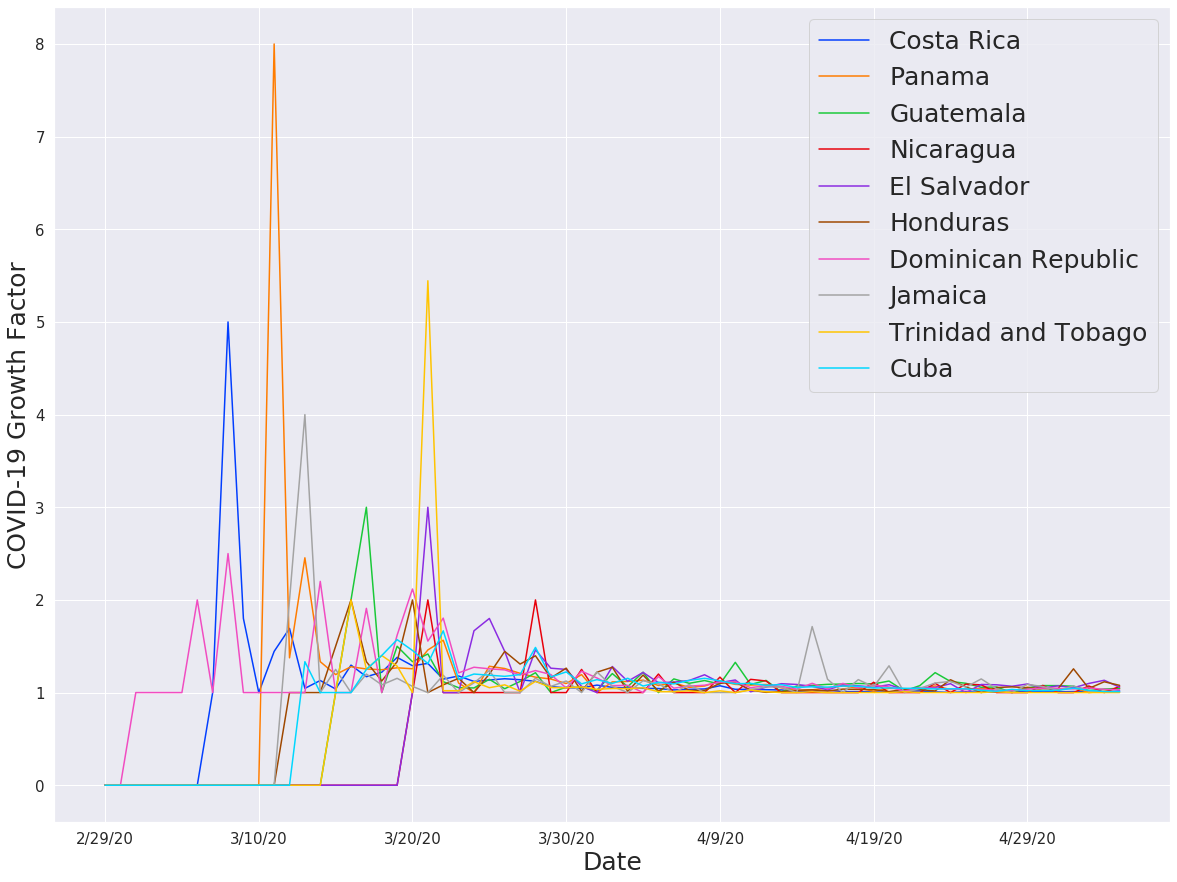

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1.041377,1.060689,0.900064,0.753506,0.821420,0.935188,1.144948,0.947943,0.884618,0.912874
std,0.614215,0.980697,0.556296,0.524382,0.601478,0.479103,0.375445,0.589099,0.730539,0.470305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008265,1.018134,1.000000,0.000000,0.000000,1.000000,1.017831,1.000000,1.000000,1.010857
50%,1.031196,1.056338,1.060000,1.000000,1.057658,1.033937,1.049617,1.040000,1.000000,1.055096
75%,1.120963,1.156241,1.118719,1.000000,1.102899,1.131864,1.165257,1.112943,1.023966,1.141321
max,5.000000,8.000000,3.000000,2.000000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


In [17]:
growth_df.mean()

Costa Rica             1.041377
Panama                 1.060689
Guatemala              0.900064
Nicaragua              0.753506
El Salvador            0.821420
Honduras               0.935188
Dominican Republic     1.144948
Jamaica                0.947943
Trinidad and Tobago    0.884618
Cuba                   0.912874
dtype: float64

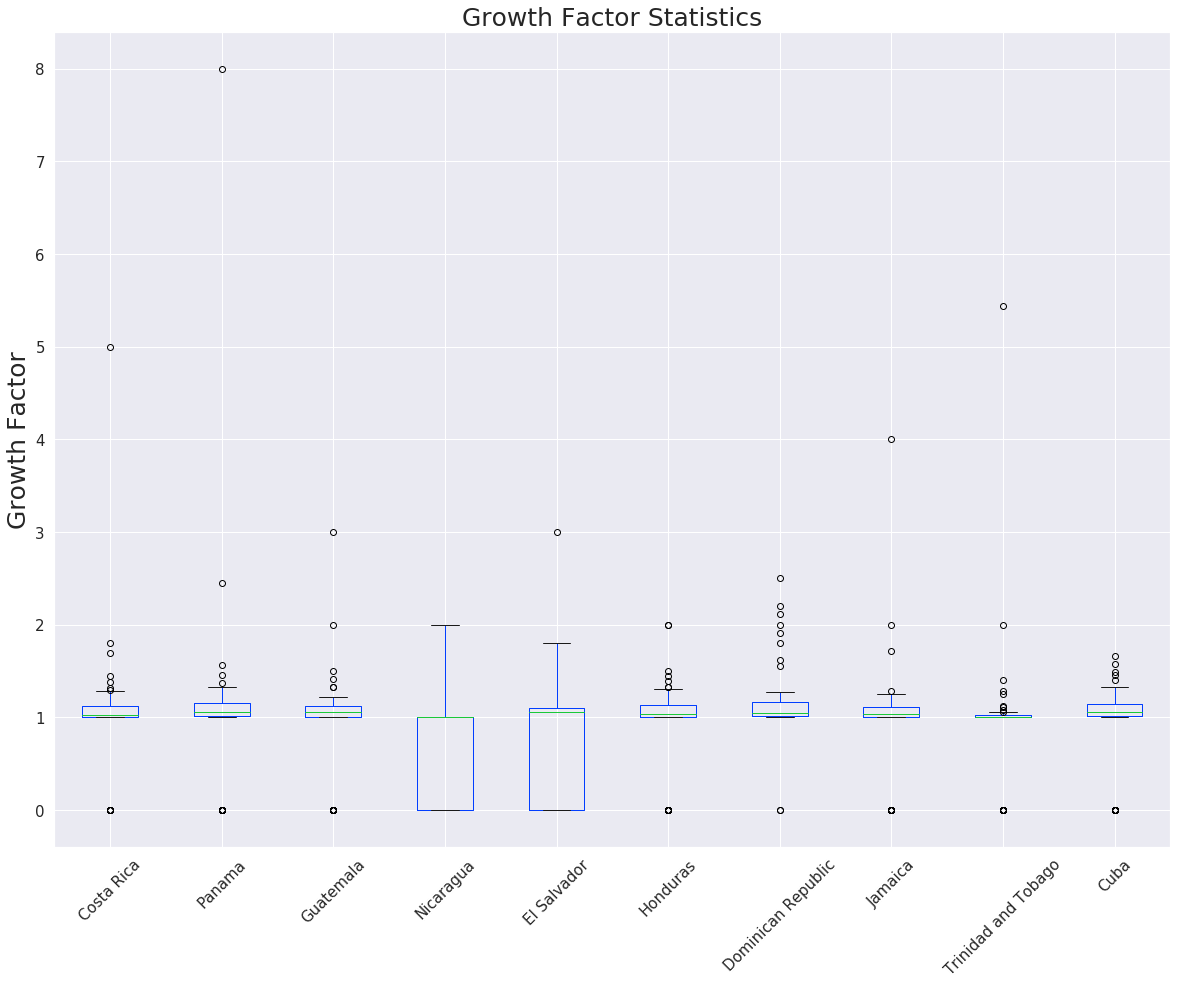

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

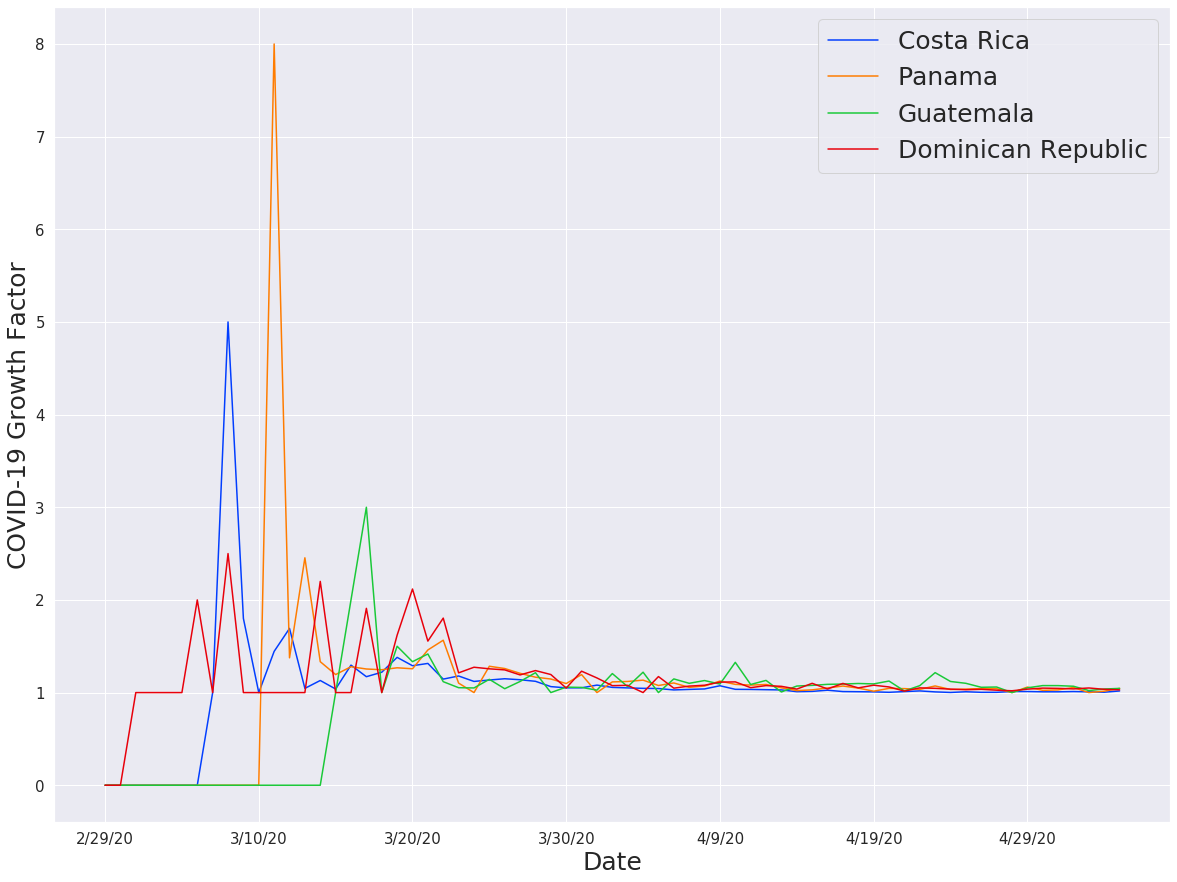

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
count,60.000000,56.000000,52.000000,47.000000,47.000000,55.000000,65.000000,55.000000,52.000000,54.000000
mean,1.162871,1.269039,1.159698,1.074147,1.170961,1.139229,1.180177,1.154767,1.139797,1.132640
std,0.527583,0.940695,0.305751,0.206468,0.317607,0.209272,0.321151,0.425324,0.627774,0.147744
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.010381,1.042537,1.050708,1.000000,1.054093,1.020299,1.025754,1.000000,1.000000,1.040472
50%,1.036856,1.078589,1.082573,1.000000,1.084577,1.051282,1.050654,1.065657,1.008811,1.082117
75%,1.131724,1.197805,1.130249,1.074176,1.131544,1.173542,1.172715,1.133760,1.046088,1.164677
max,5.000000,8.000000,3.000000,2.000000,3.000000,2.000000,2.500000,4.000000,5.444444,1.666667


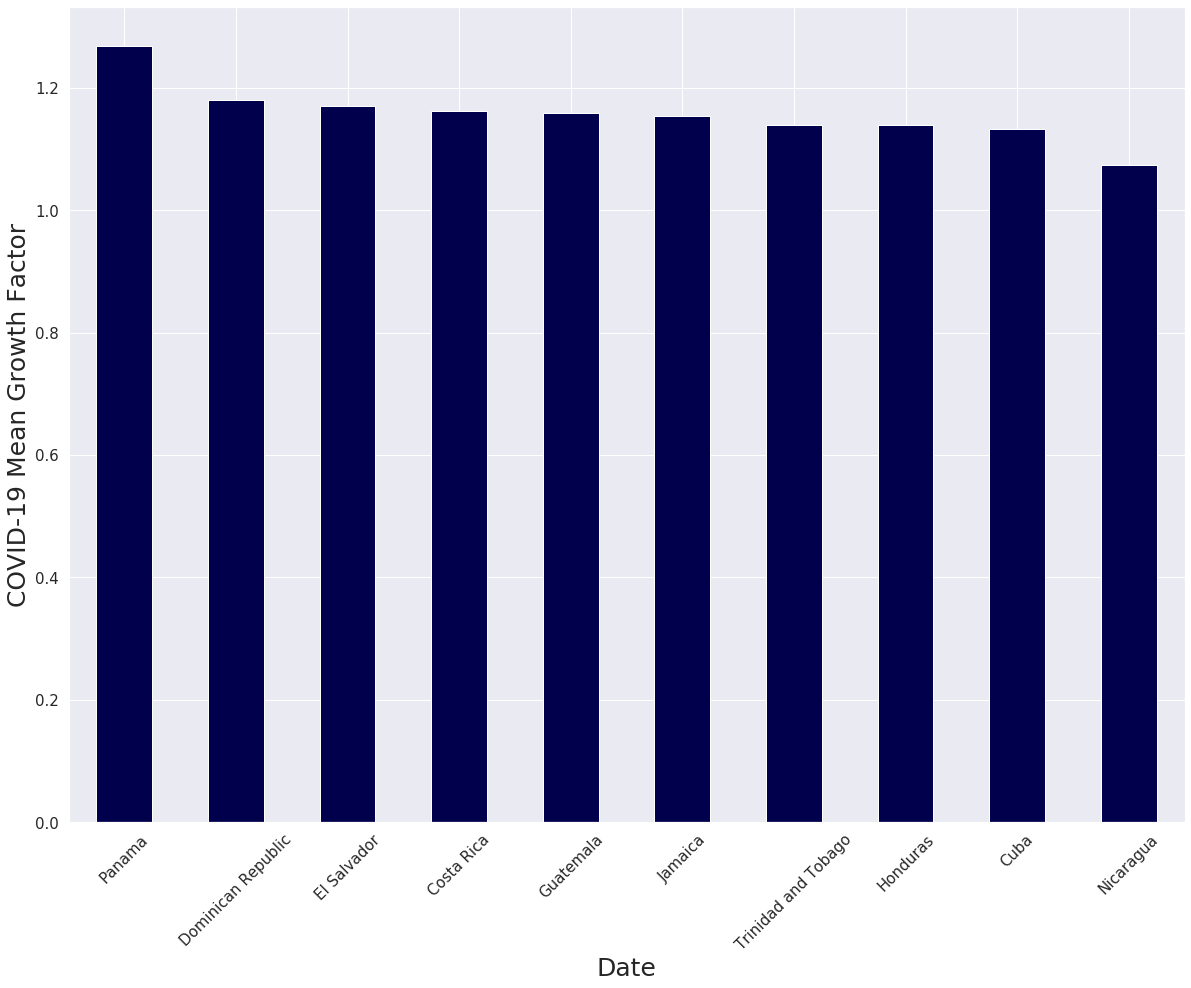

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

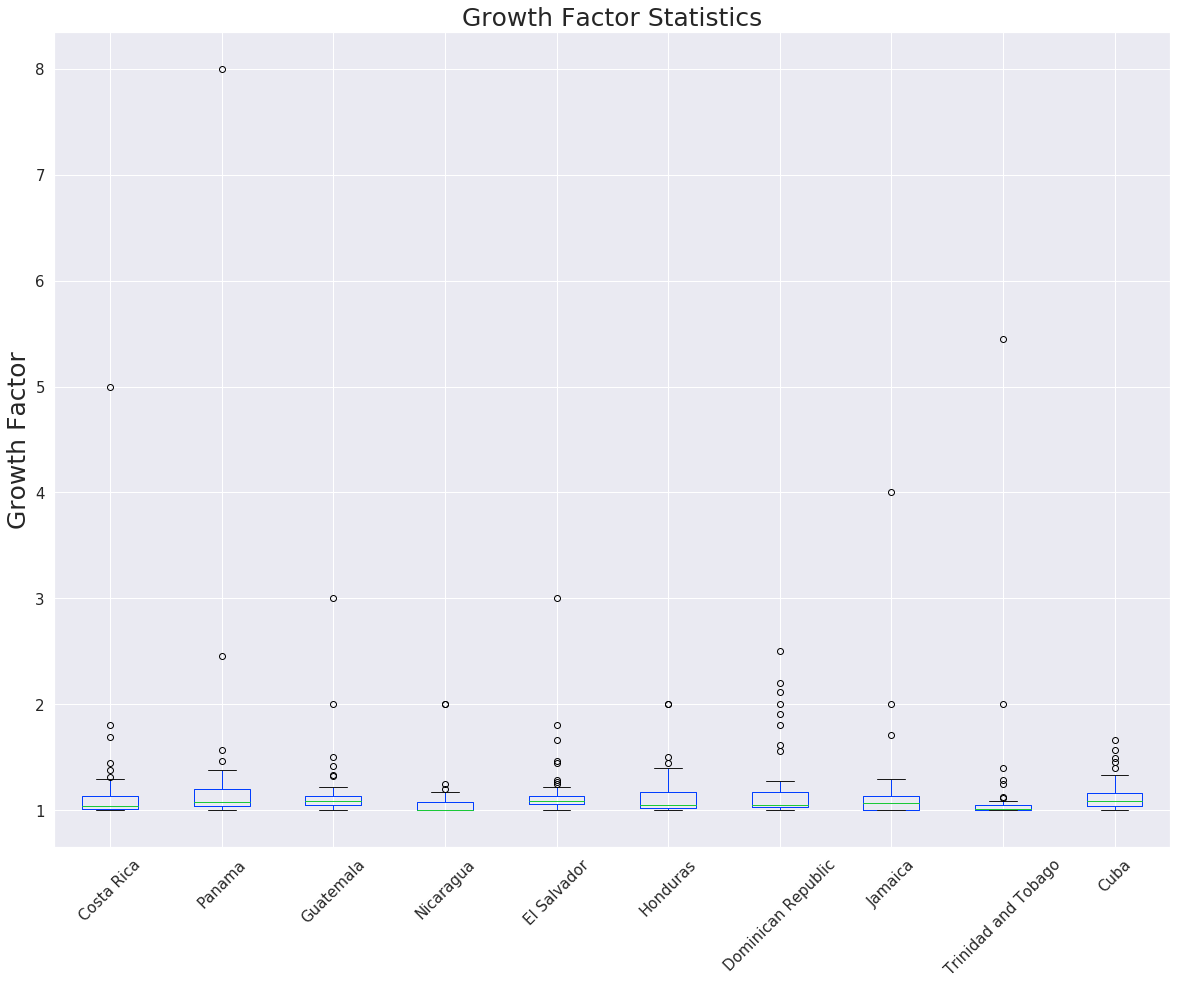

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

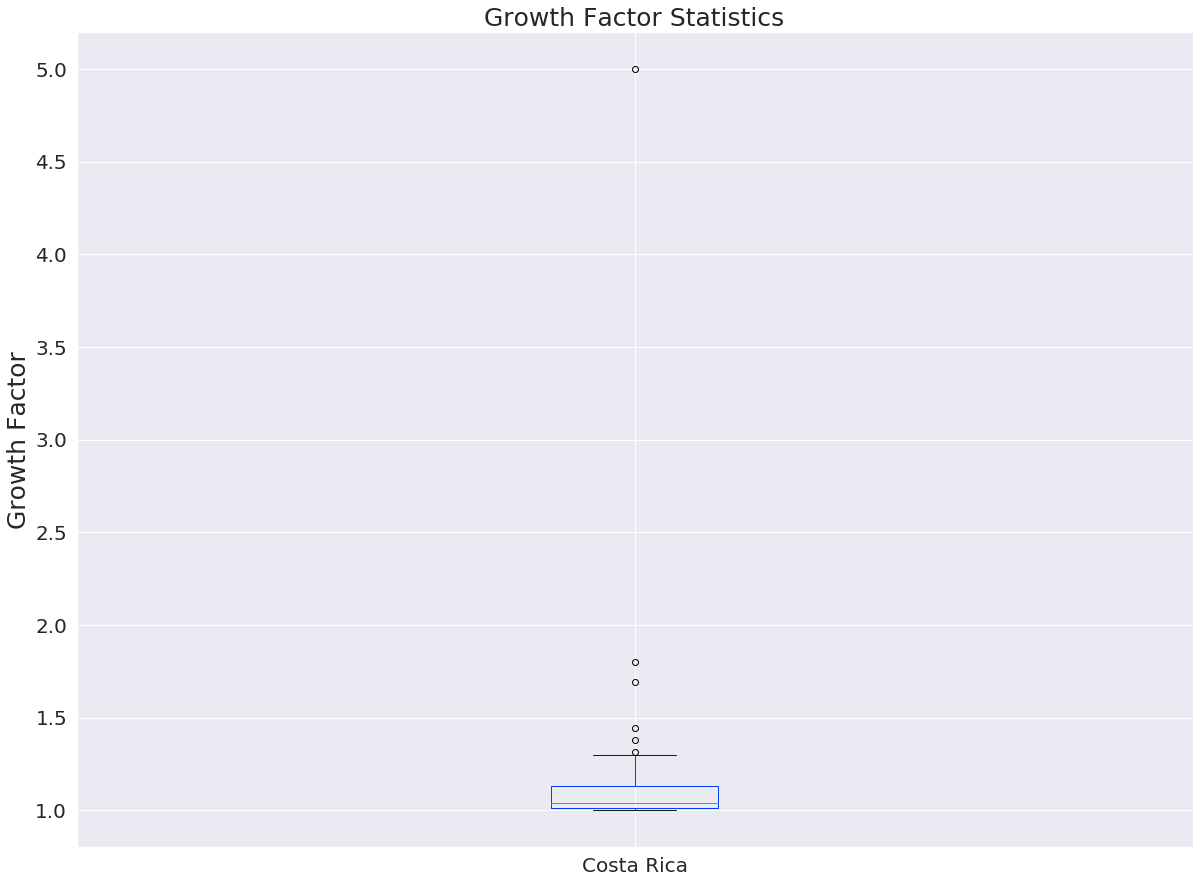

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()